In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# --- Load cleaned datasets ---
DATA_DIR = Path("../data")
countries = ["benin", "sierraleone", "togo"]
dfs = {}

for country in countries:
    file_path = DATA_DIR / f"{country}_clean.csv"
    assert file_path.exists(), f"Missing file: {file_path}"
    df = pd.read_csv(file_path)
    df["Country"] = country.capitalize()
    dfs[country] = df

# Combine all datasets
combined_df = pd.concat(dfs.values(), ignore_index=True)
combined_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Comments,_is_outlier_z3,_was_missing,_cleaned_flag,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,998,0,0.0,26.3,26.2,NaN,False,False,False,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,998,0,0.0,26.3,26.2,NaN,False,False,False,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,997,0,0.0,26.4,26.2,NaN,False,False,False,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,997,0,0.0,26.4,26.3,NaN,False,False,False,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,997,0,0.0,26.4,26.3,NaN,False,False,False,Benin


Metric Comparison: Boxplots for GHI, DNI, DHI

C:\Users\user\AppData\Local\Temp\ipykernel_5772\115826094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="Set2")


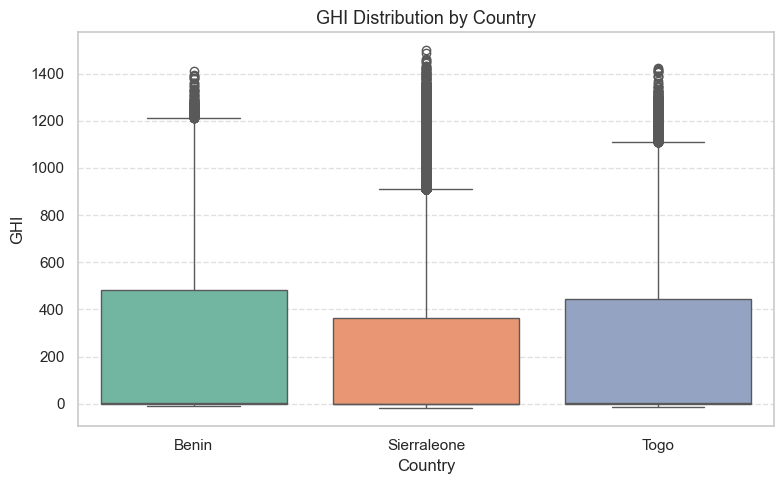

C:\Users\user\AppData\Local\Temp\ipykernel_5772\115826094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="Set2")


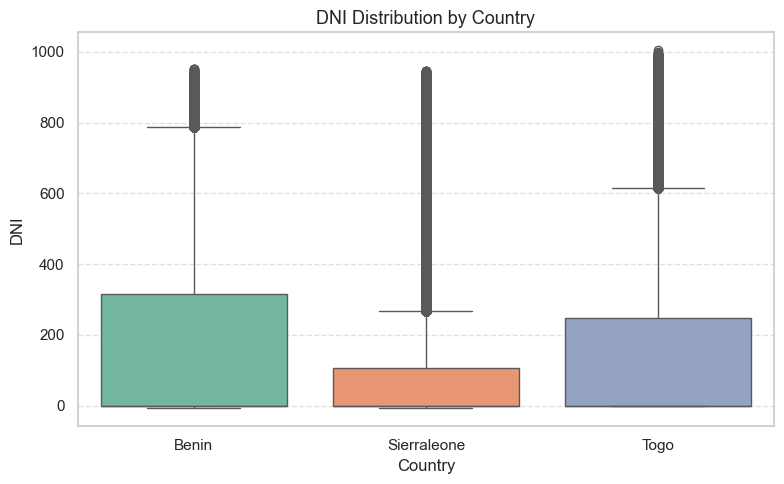

C:\Users\user\AppData\Local\Temp\ipykernel_5772\115826094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="Set2")


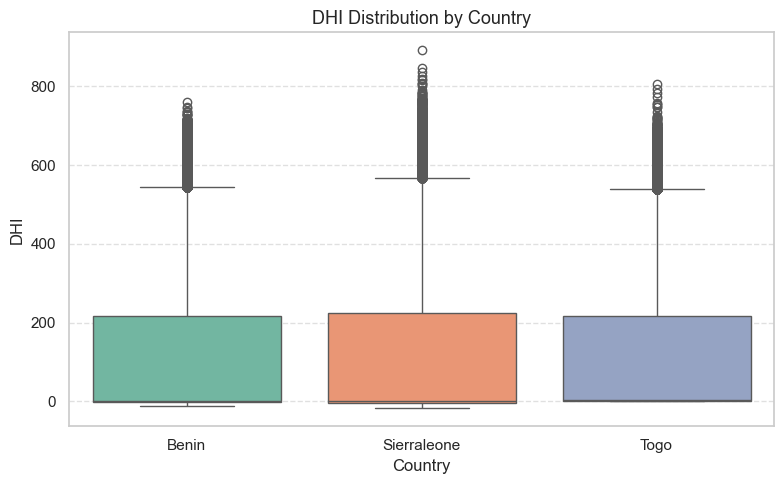

In [4]:
sns.set(style="whitegrid")

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=combined_df, palette="Set2")
    plt.title(f"{metric} Distribution by Country", fontsize=13)
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

Summary Table (mean, median, std)

In [5]:
summary_table = (
    combined_df.groupby("Country")[["GHI", "DNI", "DHI"]]
    .agg(["mean", "median", "std"])
    .round(2)
)

summary_table

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.35    1.6   
Sierraleone  201.90    0.3  298.49  116.36   -0.1  218.64  113.68   -0.1   
Togo         230.55    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
Sierraleone  158.95  
Togo         156.52

Statistical Testing: ANOVA and Kruskal–Wallis

In [6]:
ghi_groups = [dfs[c]["GHI"].dropna() for c in countries]

# One-way ANOVA
anova_stat, anova_p = stats.f_oneway(*ghi_groups)

# Kruskal–Wallis (non-parametric alternative)
kruskal_stat, kruskal_p = stats.kruskal(*ghi_groups)

print(f"One-way ANOVA: F = {anova_stat:.3f}, p = {anova_p:.5f}")
print(f"Kruskal–Wallis: H = {kruskal_stat:.3f}, p = {kruskal_p:.5f}")

if anova_p < 0.05 or kruskal_p < 0.05:
    print("=> Significant difference detected between countries (p < 0.05)")
else:
    print("=> No significant difference detected between countries (p ≥ 0.05)")

One-way ANOVA: F = 2095.614, p = 0.00000
Kruskal–Wallis: H = 4510.023, p = 0.00000
=> Significant difference detected between countries (p < 0.05)


Visual Summary — Average GHI Ranking

C:\Users\user\AppData\Local\Temp\ipykernel_5772\2602222088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")


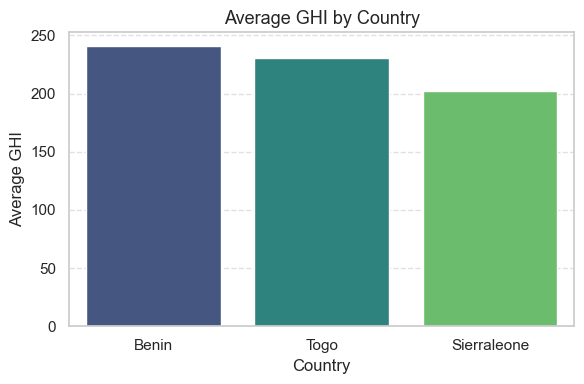

In [7]:
avg_ghi = combined_df.groupby(
    "Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")
plt.title("Average GHI by Country", fontsize=13)
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()